In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_NE_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,NaN,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,NaN,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,NaN,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,NaN,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,NaN,0.0
211,1.52065,NaN,0.00,2.02,NaN,0.00,8.44,1.64,NaN
212,1.51651,NaN,0.00,NaN,73.61,0.00,8.48,1.57,0.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	26
float64		column 2	25
float64		column 3	20
float64		column 4	31
float64		column 5	15
float64		column 6	10
float64		column 7	10
float64		column 8	16
float64		column 9	31


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,188.000000,189.000000,194.000000,183.000000,199.000000,204.000000,204.000000,198.000000,183.000000
mean,1.518351,13.417989,2.711392,1.422951,72.664171,0.501814,8.973725,0.151263,0.052131
std,0.002901,0.809458,1.411344,0.467539,0.785054,0.665487,1.447146,0.443315,0.094278
min,1.511150,10.730000,0.000000,0.340000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516595,12.930000,2.210000,1.190000,72.330000,0.127500,8.237500,0.000000,0.000000
50%,1.517720,13.330000,3.480000,1.350000,72.810000,0.555000,8.600000,0.000000,0.000000
75%,1.519095,13.790000,3.597500,1.570000,73.095000,0.610000,9.192500,0.000000,0.090000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,2.880000,0.510000


<AxesSubplot:>

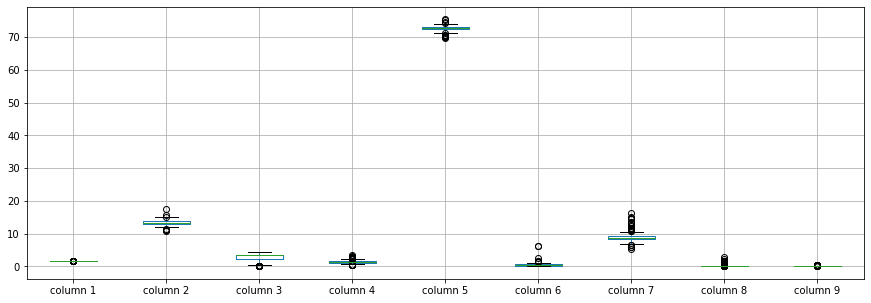

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518351
column 2    13.417989
column 3     2.711392
column 4     1.422951
column 5    72.664171
column 6     0.501814
column 7     8.973725
column 8     0.151263
column 9     0.052131
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.244499,-0.134140,-0.383458,-0.615195,-0.277716,0.819056,-0.159541,0.104784
column 2,-0.244499,1.000000,-0.242889,0.095485,-0.054449,-0.290861,-0.255812,0.424035,-0.282652
column 3,-0.134140,-0.242889,1.000000,-0.408382,-0.141053,0.064244,-0.483145,-0.445725,0.128320
column 4,-0.383458,0.095485,-0.408382,1.000000,-0.061615,0.402107,-0.253175,0.451724,0.005020
column 5,-0.615195,-0.054449,-0.141053,-0.061615,1.000000,-0.198510,-0.200476,-0.063073,-0.002194
column 6,-0.277716,-0.290861,0.064244,0.402107,-0.198510,1.000000,-0.331465,-0.020870,0.034449
column 7,0.819056,-0.255812,-0.483145,-0.253175,-0.200476,-0.331465,1.000000,-0.241375,0.028913
column 8,-0.159541,0.424035,-0.445725,0.451724,-0.063073,-0.020870,-0.241375,1.000000,-0.118727
column 9,0.104784,-0.282652,0.128320,0.005020,-0.002194,0.034449,0.028913,-0.118727,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+19,9+19+19,9+19+19+19,9+19+19+19+19,9+19+19+19+19+19,9+19+19+19+19,9+19+19+19,9+19+19,9+19,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 94.51277923583984
Epoch: 1 , loss: 94.48161961482121
Epoch: 2 , loss: 94.83215801532452
Epoch: 3 , loss: 94.52641002948468
Epoch: 4 , loss: 94.43913738544171
Epoch: 5 , loss: 94.53193840613731
Epoch: 6 , loss: 94.30113161527194
Epoch: 7 , loss: 94.64949622521034
Epoch: 8 , loss: 94.68475987361028
Epoch: 9 , loss: 94.36622032752403
Epoch: 10 , loss: 94.30182471642128
Epoch: 11 , loss: 94.60863553560696
Epoch: 12 , loss: 94.44839242788461
Epoch: 13 , loss: 94.72292856069711
Epoch: 14 , loss: 94.2414803138146
Epoch: 15 , loss: 94.76092177170973
Epoch: 16 , loss: 94.67873441256009
Epoch: 17 , loss: 94.6065163245568
Epoch: 18 , loss: 94.68038646991437
Epoch: 19 , loss: 94.81612454927884
Epoch: 20 , loss: 94.38546459491437
Epoch: 21 , loss: 94.79590430626503
Epoch: 22 , loss: 94.78771151029147
Epoch: 23 , loss: 94.32254556509164
Epoch: 24 , loss: 94.30518693190355
Epoch: 25 , loss: 94.38158710186298
Epoch: 26

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.519660
column 2    14.770000
column 3     3.750000
column 4     0.027793
column 5    72.020000
column 6     0.030000
column 7     9.000000
column 8     0.000000
column 9     0.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.000000,0.000000,0.000000,-71.752071,0.0,0.0,0.000000,0.00000
1,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000
2,0.0,0.000000,-3.522760,0.000000,0.000000,0.0,0.0,0.000000,0.00000
3,0.0,0.000000,-3.660366,0.000000,0.000000,0.0,0.0,0.000000,0.00000
4,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...
209,0.0,0.000000,0.000000,-2.853535,0.000000,0.0,0.0,0.000000,0.00000
210,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-1.575667,0.00000
211,0.0,-14.332841,0.000000,0.000000,-73.392874,0.0,0.0,0.000000,0.02014
212,0.0,-14.356914,0.000000,-1.916830,0.000000,0.0,0.0,0.000000,0.00000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(290.27204296953454, 1090.4359815890969)

In [17]:
NRMS=numerator/denominator
NRMS


0.2661981518131123

In [18]:
new_df.iloc[66,:]

column 1     1.521520
column 2    13.050000
column 3     3.650000
column 4     0.870000
column 5     0.026203
column 6     0.190000
column 7     0.026160
column 8     0.000000
column 9     0.170000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.640000,4.490000,1.100000,0.027929,0.06,8.75,0.000000,0.00000
1,1.51761,13.890000,3.600000,1.360000,72.730000,0.48,7.83,0.000000,0.00000
2,1.51618,13.530000,0.027240,1.540000,72.990000,0.39,7.78,0.000000,0.00000
3,1.51766,13.210000,0.029634,1.290000,72.610000,0.57,8.22,0.000000,0.00000
4,1.51742,13.270000,3.620000,1.240000,73.080000,0.55,8.07,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.140000,0.000000,0.026465,72.610000,0.08,9.18,1.060000,0.00000
210,1.51685,14.920000,0.000000,1.990000,73.060000,0.00,8.40,0.014333,0.00000
211,1.52065,0.027159,0.000000,2.020000,0.027126,0.00,8.44,1.640000,0.02014
212,1.51651,0.023086,0.000000,0.023170,73.610000,0.00,8.48,1.570000,0.00000


In [20]:
imputations[-1].to_excel("Glass_NE_10(imp).xlsx", index=False, header=False)